# Principal Component Analysis using the Cancer Data

## Introduction
PCA is used to explain the variance-covariance structure of the attributes or variables or features in a dataset using a few linear combinations of those variables. This analysis serves as an intermediate step to much large objectives such as classification or regression analysis or cluster analysis or factor analysis. 

This assignment walks through doing a principal component analysis using numpy library functions. There are many other libraries in Python that might achieve the same , one such instance is provided towards the end. 

In [7]:
# By default in a Jupyter notebook, a cell with multiple print commands, when run, would print only the last one. 
# This piece of code would modify that to print all the relevant lines in the cell.  
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#this increases the wdith of the notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

display(HTML("<style>.container { height:100% !important; }</style>"))

In [8]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

## Loading the data

To illustrate PCA we will use the Breast Cancer data available here https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/

The data was collected in 1995 and has 569 observations and each observation has 30 features or attributes. There are no missing attribute values. There are two classes : Malignant (38%) and Benign ( 62%).

You can read more about the data https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

For this analysis, the files used are wdbc.data (and wdbc.names for the column headers)

In [9]:
#load the data and quickly assess if it was loaded correctly by printing the first/last few rows

missing_value_formats = ["n.a.","?","NA","n/a", "na", "--", " "]
colnames = ['ID', 'Diagnosis', 'mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension']
df_raw = pd.read_csv('wdbc.data', header = None, names = colnames, na_values = missing_value_formats)
#note: na_values allows for additional strings to be recognized as NA/NaN
df_raw.shape
#shape gets the size (row, column)
df_raw.head(5)
df_raw.tail(5)

(569, 32)

ID Diagnosis  mean radius  mean texture  mean perimeter  mean area  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   mean smoothness  mean compactness  mean concavity  mean concave points  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  worst radius  worst texture  worst perimeter  worst area  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

ID Diagnosis  mean radius  mean texture  mean perimeter  mean area  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     mean smoothness  mean compactness  mean concavity  mean concave points  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  worst radius  worst texture  worst perimeter  worst area  \
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  
564                0.2216          0.2060                  0.07115  
565                0.1628          0.2572                  0.06637  
566                0.1418          0.2218                  0.07820  
567                0.2650          0.4087                  0.12400  
568                0.0000          0.2871                  0.07039  

[5 rows x 32 columns]

## EDA

### Descriptive Statistics
In case there are missing values, outliers, format mismatches, erroneous observations, additional attributes not relevant for the analysis etc., we might have to redo this section multiple times till we achieve a level of condifence in the accuracy of the dataset. This dataset does not have any missing values or anomolous observations of concern.

Lets compute summary statistics and information on data types.

In [10]:
df_raw.describe()
#dataframe.describe returns basic statistics, count, mean, std, min, 25%, 50%, 75%, max along each column

ID  mean radius  mean texture  mean perimeter    mean area  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  ...  worst radius  worst texture  worst perimeter  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        worst area  worst smoothness  worst compactness  worst concavity  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       worst concave points  worst symmetry  worst fractal dimension  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

In [11]:
df_raw.info()
#So this spits out data types, and if there's null data, associated with the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   mean radius              569 non-null    float64
 3   mean texture             569 non-null    float64
 4   mean perimeter           569 non-null    float64
 5   mean area                569 non-null    float64
 6   mean smoothness          569 non-null    float64
 7   mean compactness         569 non-null    float64
 8   mean concavity           569 non-null    float64
 9   mean concave points      569 non-null    float64
 10  mean symmetry            569 non-null    float64
 11  mean fractal dimension   569 non-null    float64
 12  radius error             569 non-null    float64
 13  texture error            569 non-null    float64
 14  perimeter error          5

### Data visualization

This section is to illustrate *some*  of the data visualization techniques that might help us to judge if PCA would be helpful for this data set or not. 

The first is to check if the 30 or so attributes have visual variability between the two categories of the cancer. This is a quick check since this data set has been used for classification of tumor into categories malignant or benign, using features of the tumor. So we would want to check if there are differences in the attributes for the two categories (we will talk more about it during Regression Analysis later in the course). 

The second is to check if there are correlations between the attributes or variables. If the variables are independent (aka, correlation is 0 or close to 0), principal components would just be the attributes and would offer no dimension reduction.

C:\Users\taylo\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:182: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


C:\Users\taylo\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:182: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


C:\Users\taylo\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:182: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


C:\Users\taylo\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:182: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


C:\Users\taylo\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:182: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


C:\Users\taylo\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:182: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


C:\Users\taylo\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:182: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


C:\Users\taylo\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:182: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


C:\Users\taylo\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:182: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


C:\Users\taylo\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:182: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


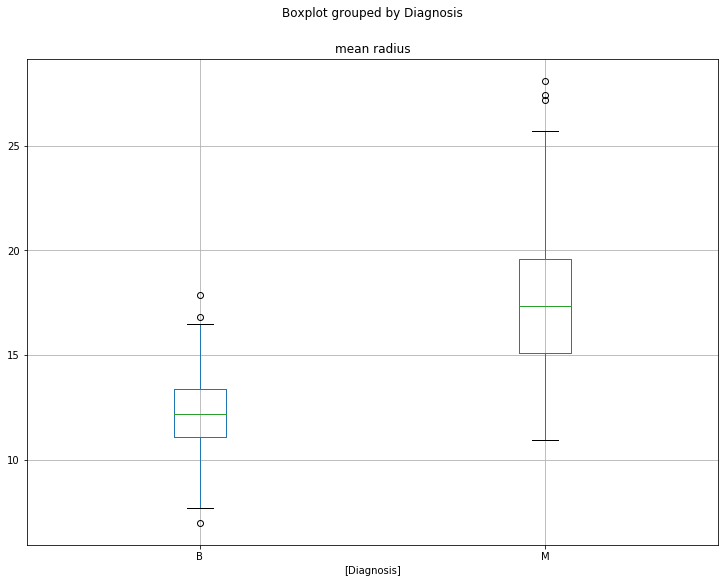

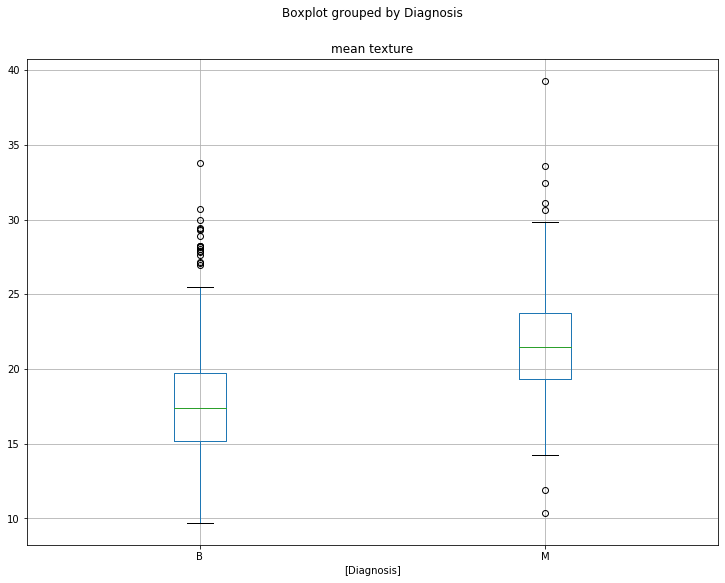

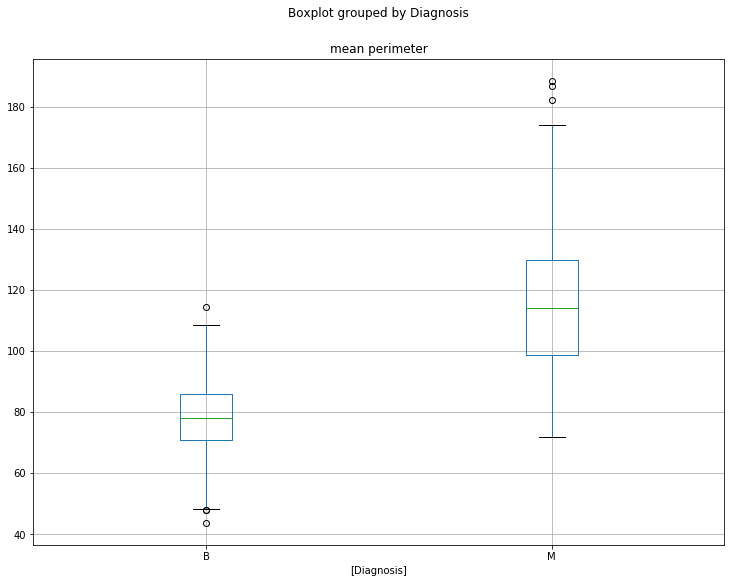

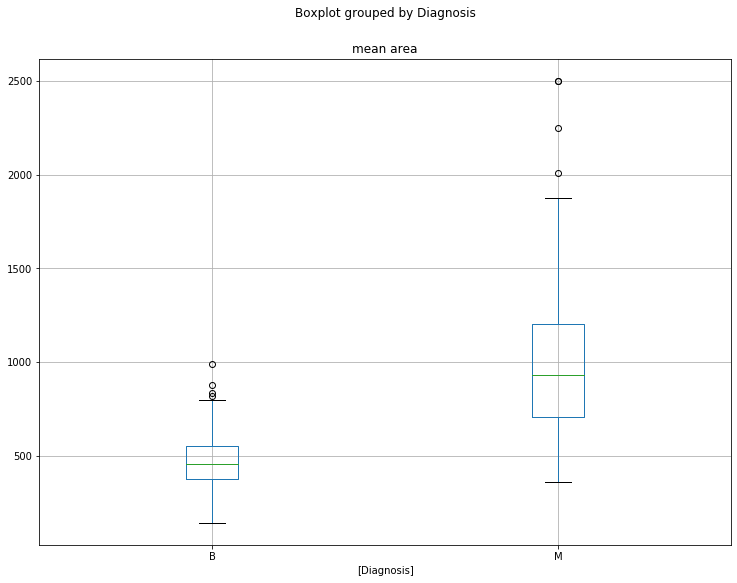

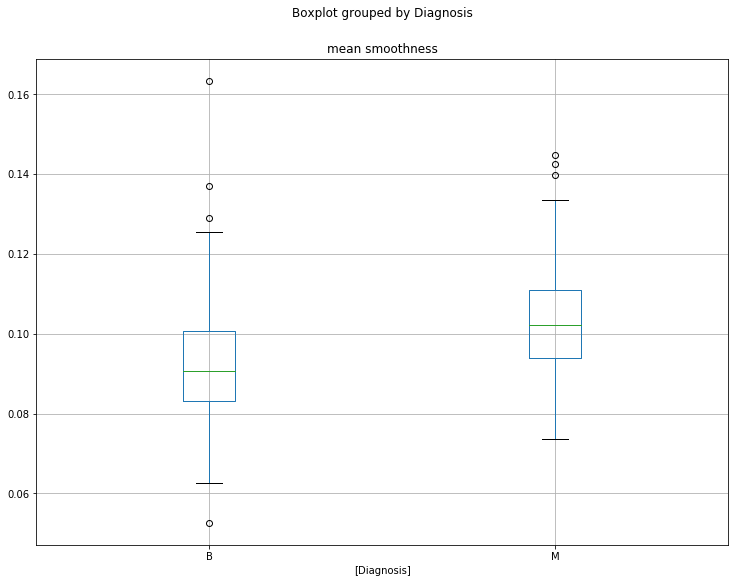

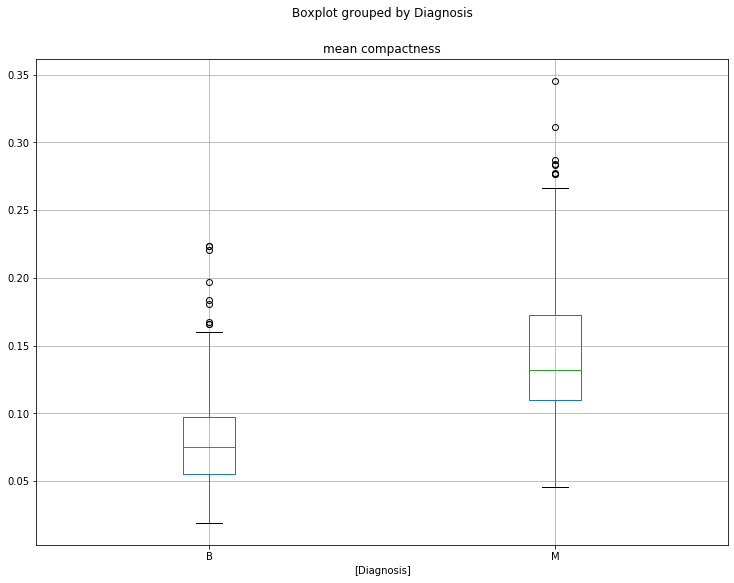

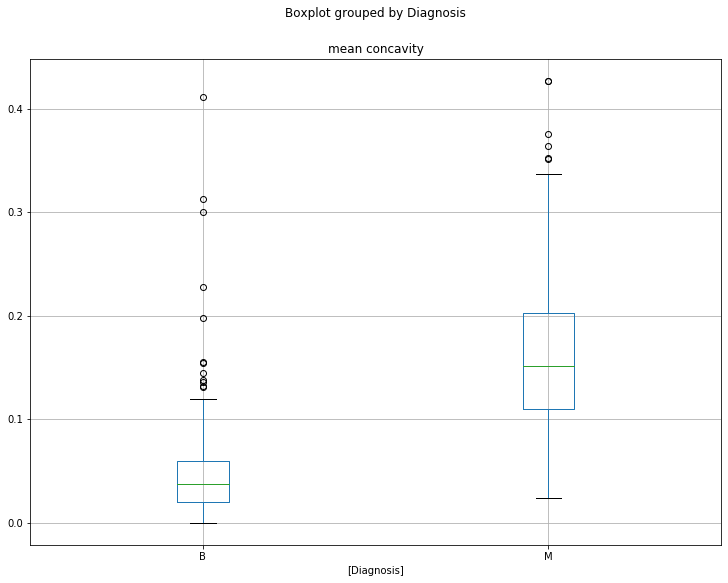

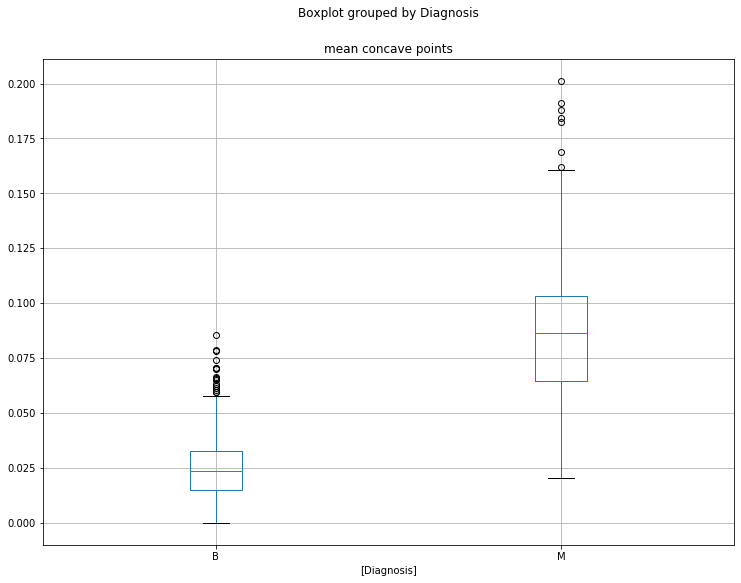

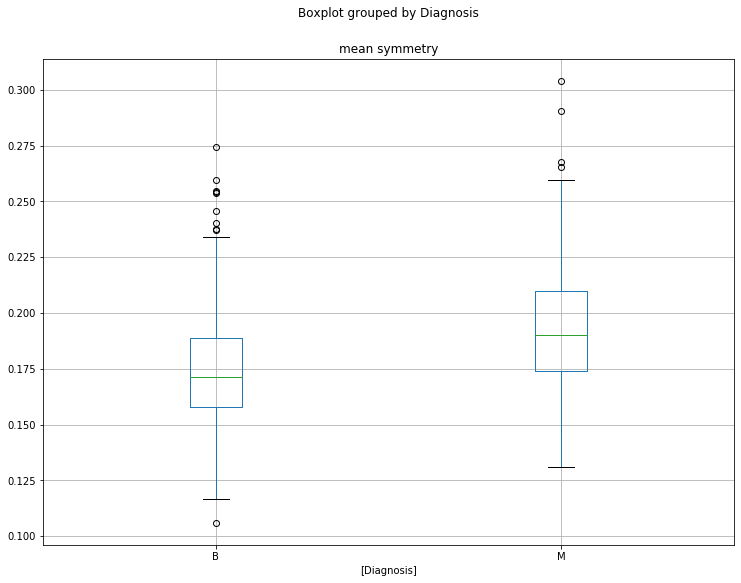

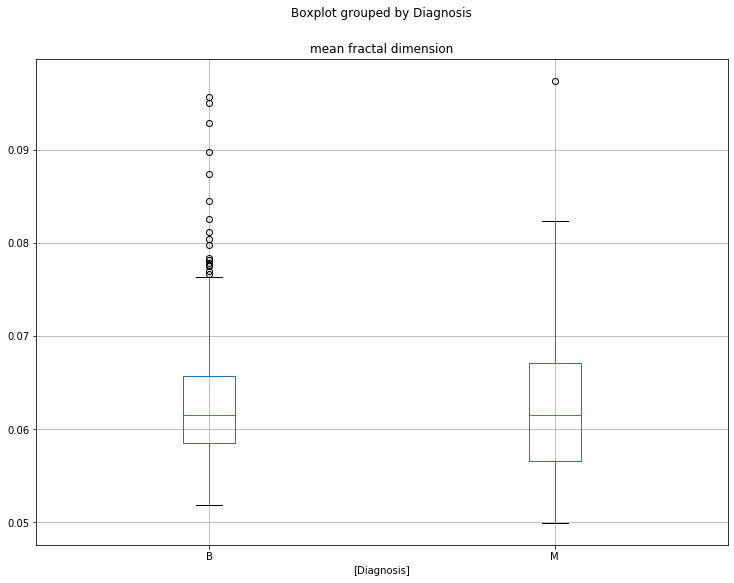

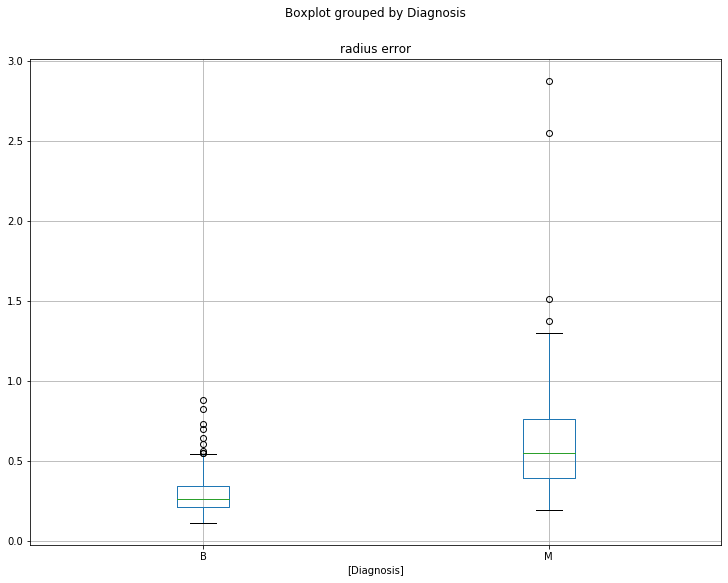

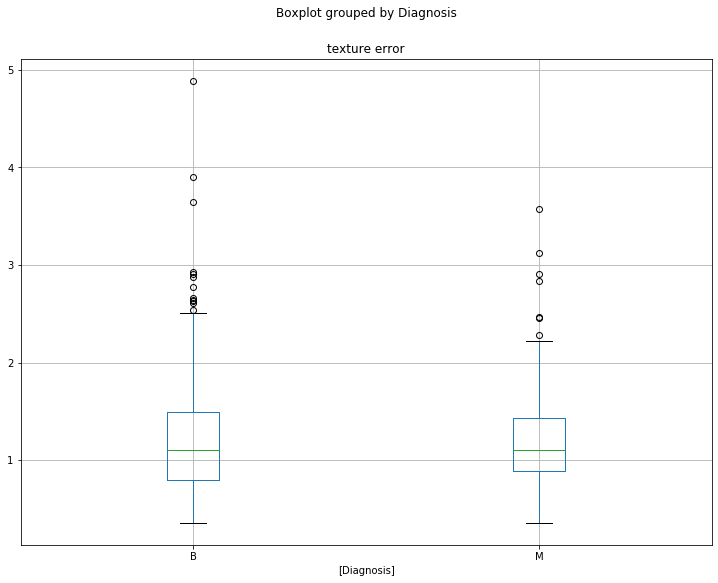

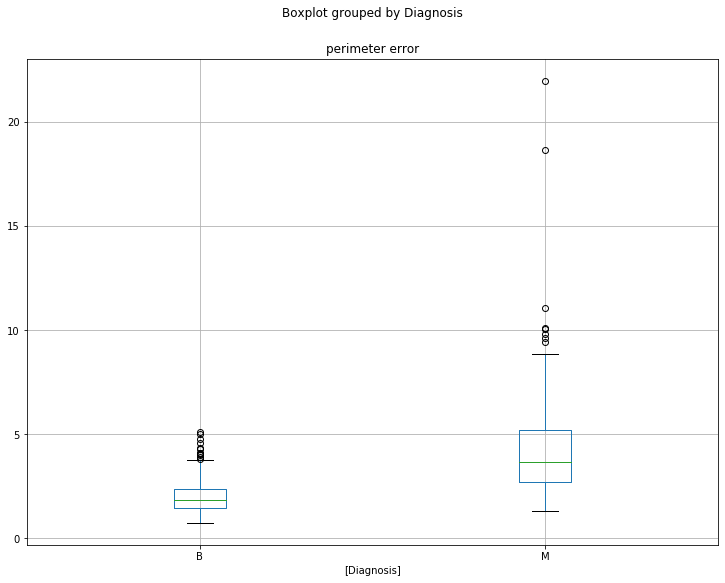

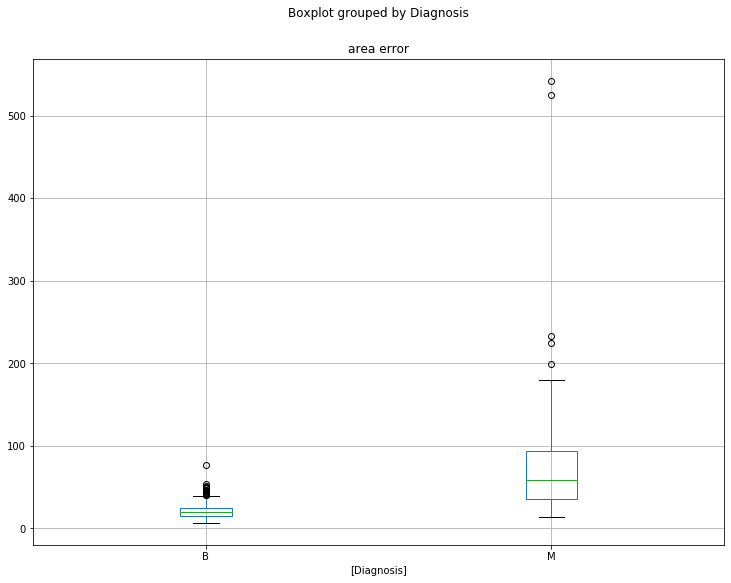

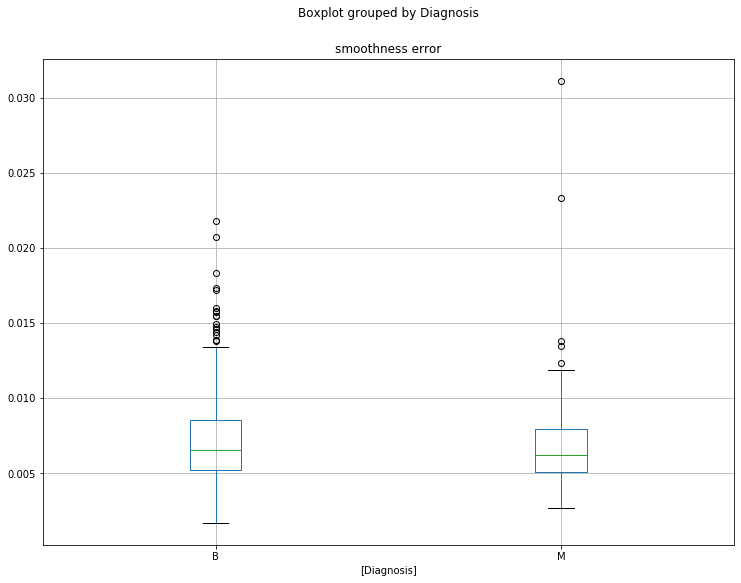

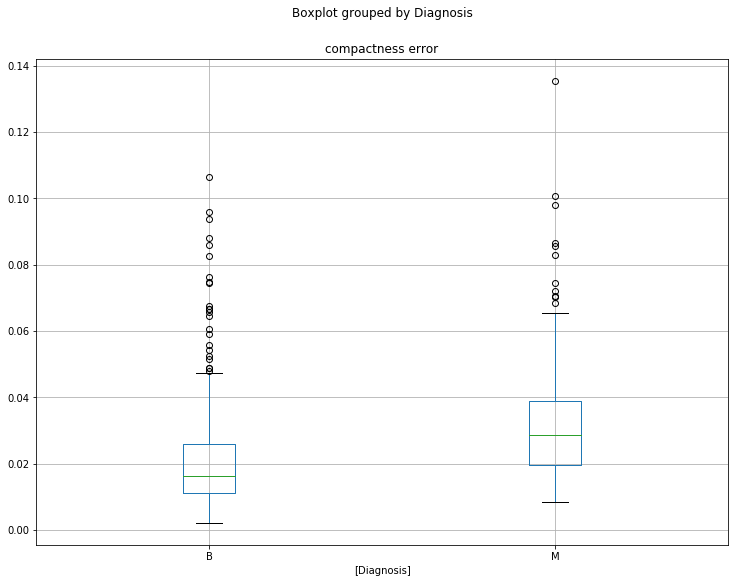

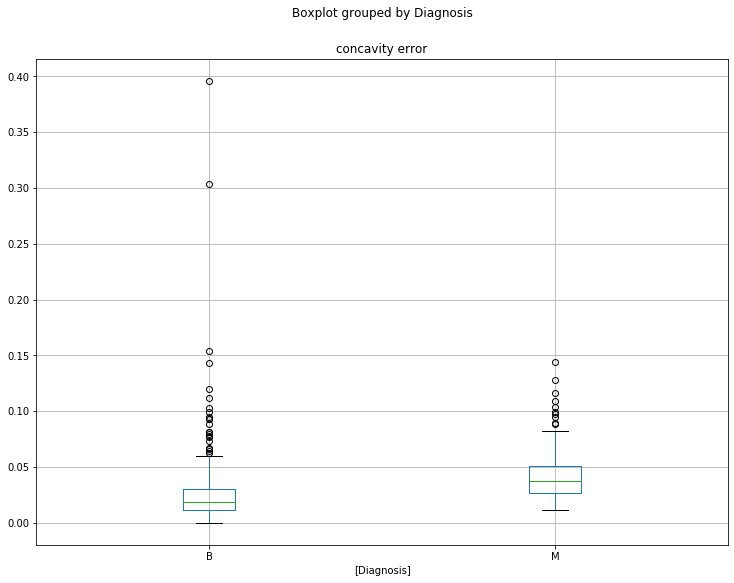

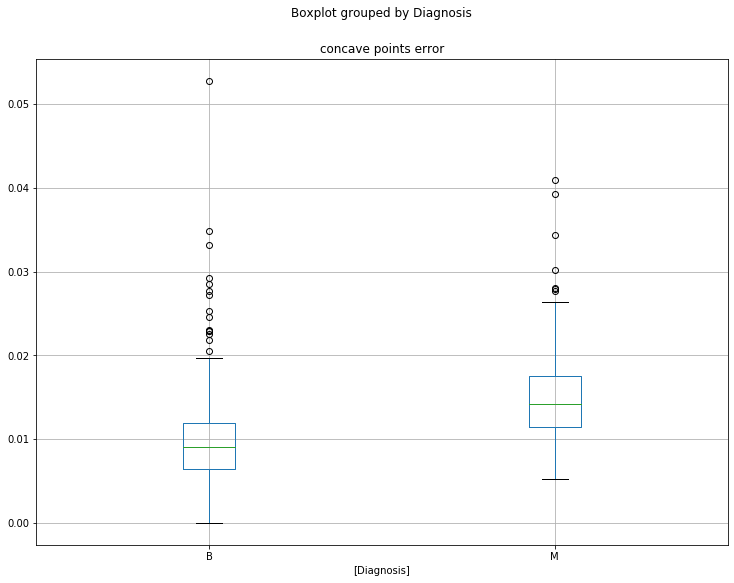

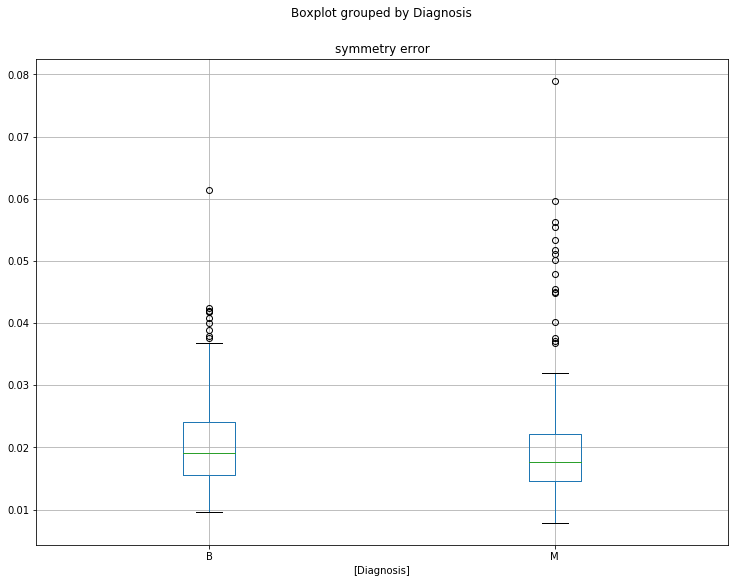

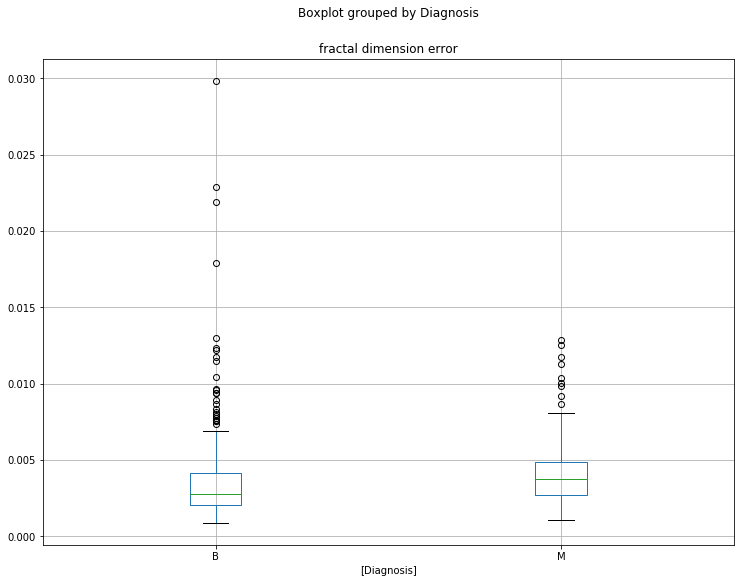

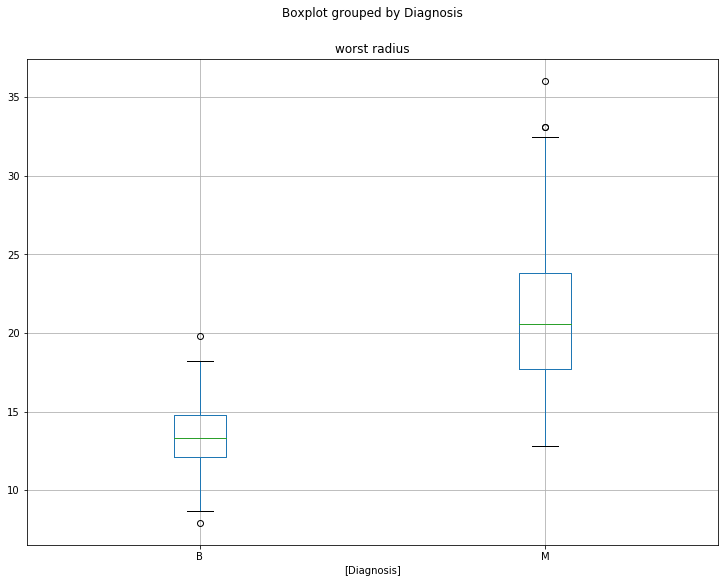

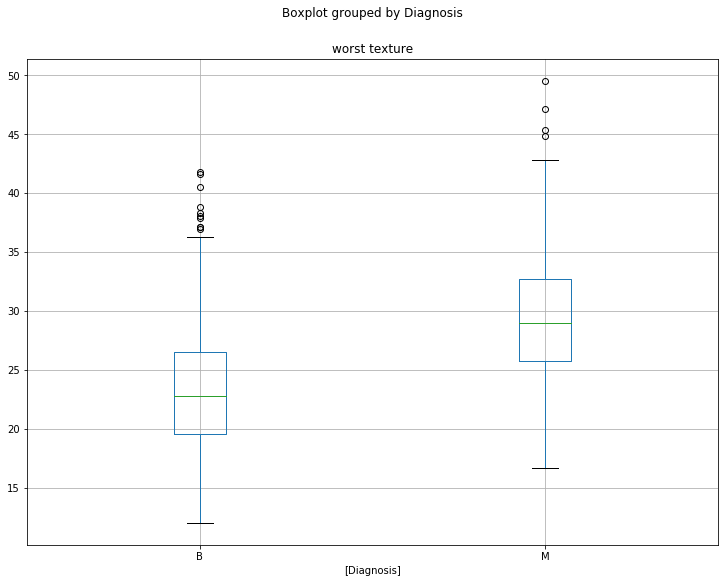

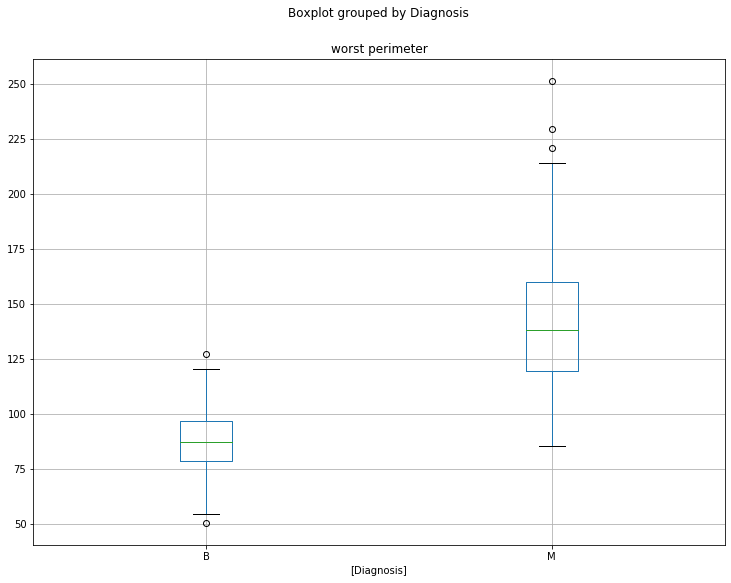

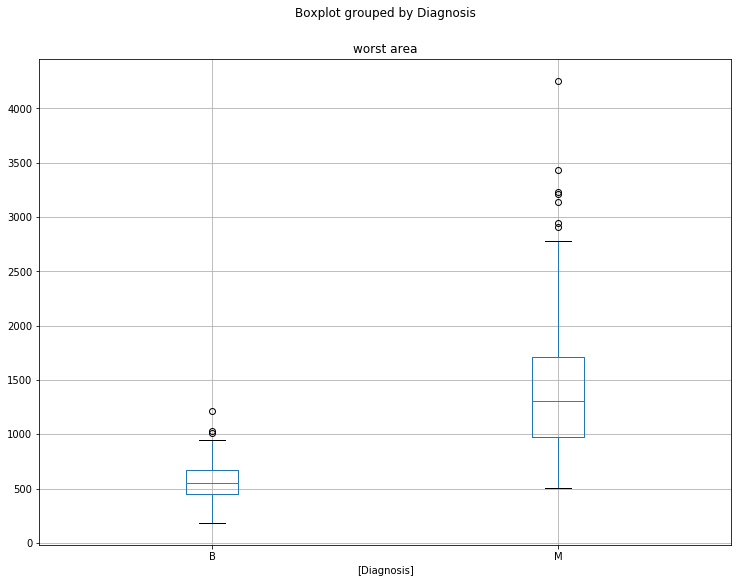

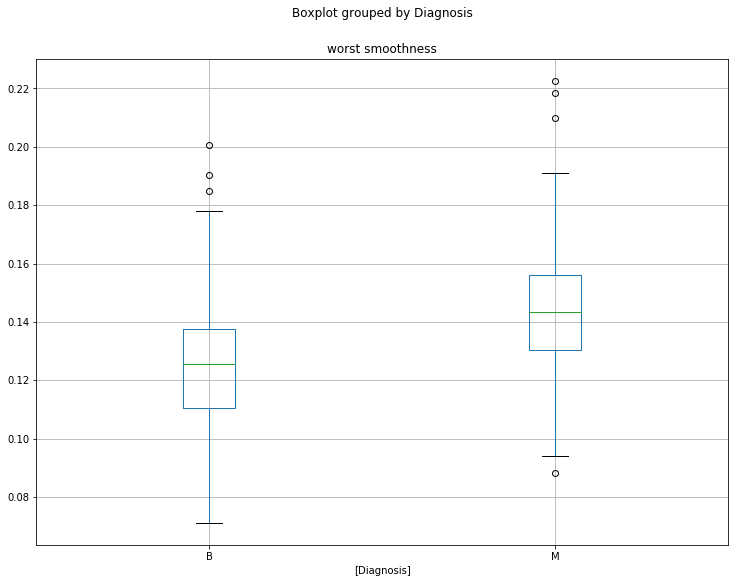

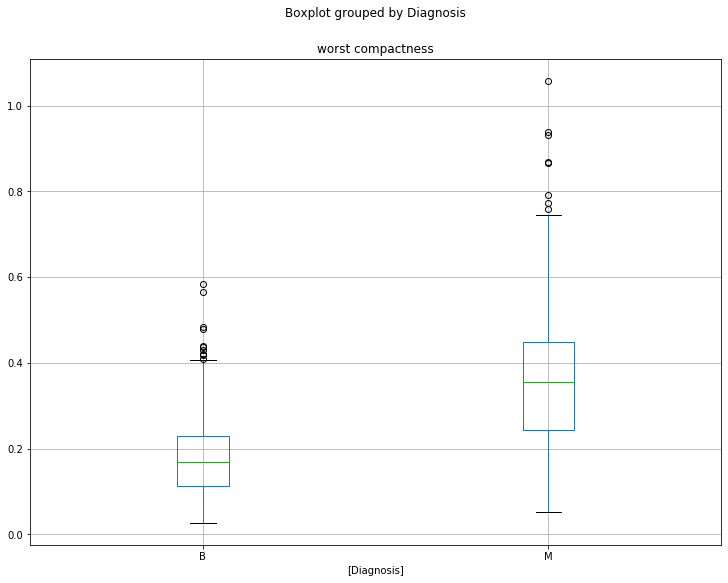

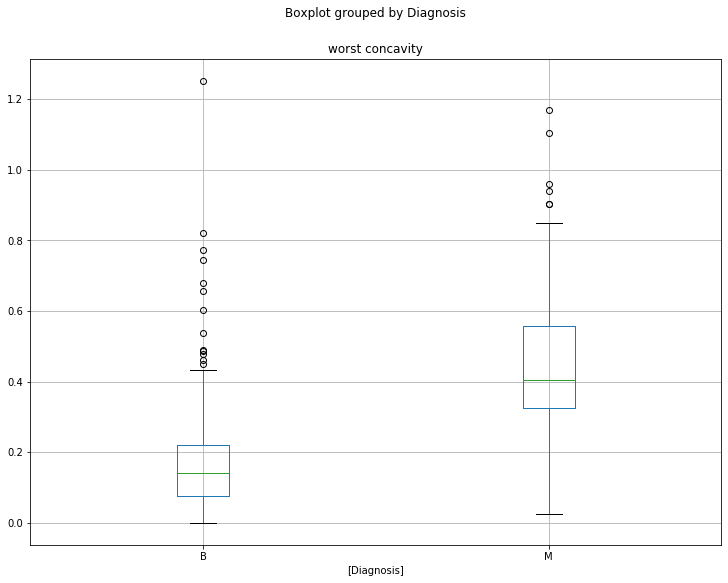

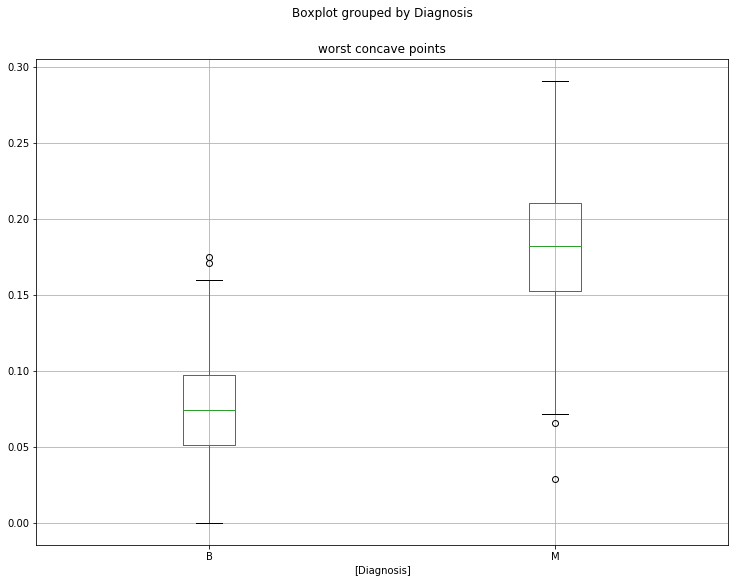

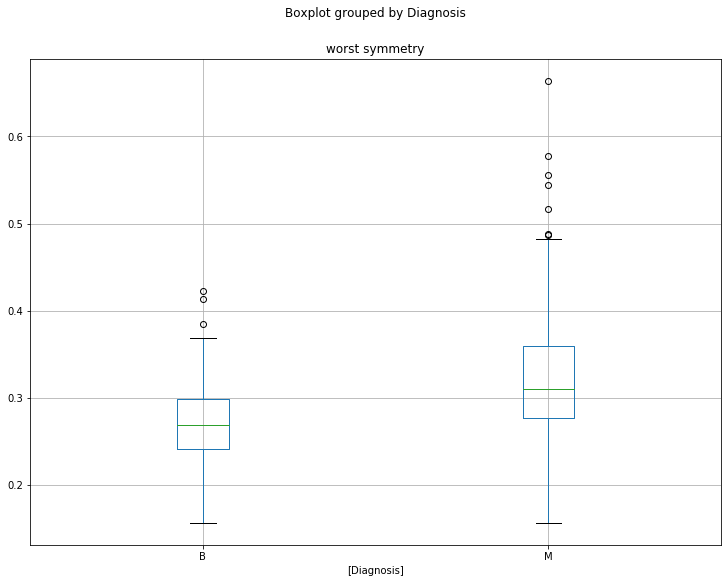

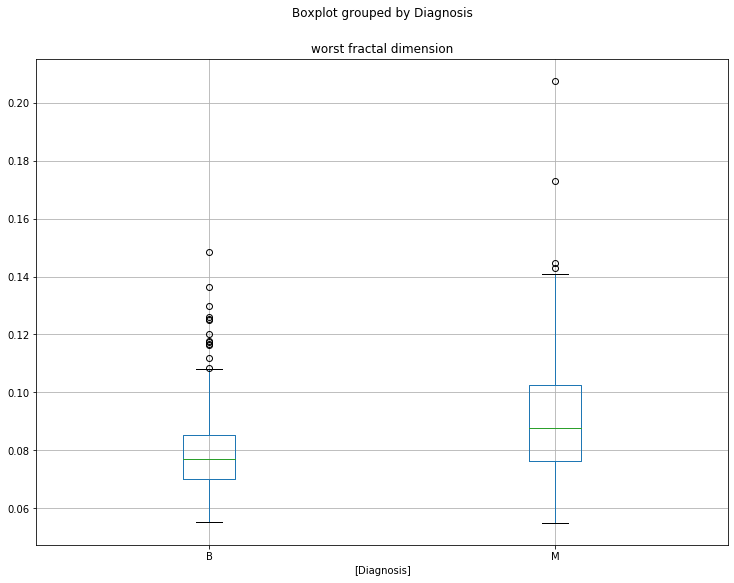

In [12]:
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
# Please note the hardcoded values "-2" in the range and "+2" in the indexing the colnames are to ensure 
# that we do not the plot for the first two columns , ID and Diagnosis

for i in range(df_raw.shape[1]-2):
    df_raw.boxplot(column=colnames[i+2] , by=['Diagnosis'], figsize=(12,9))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C2C812ED08>,
      dtype=object)

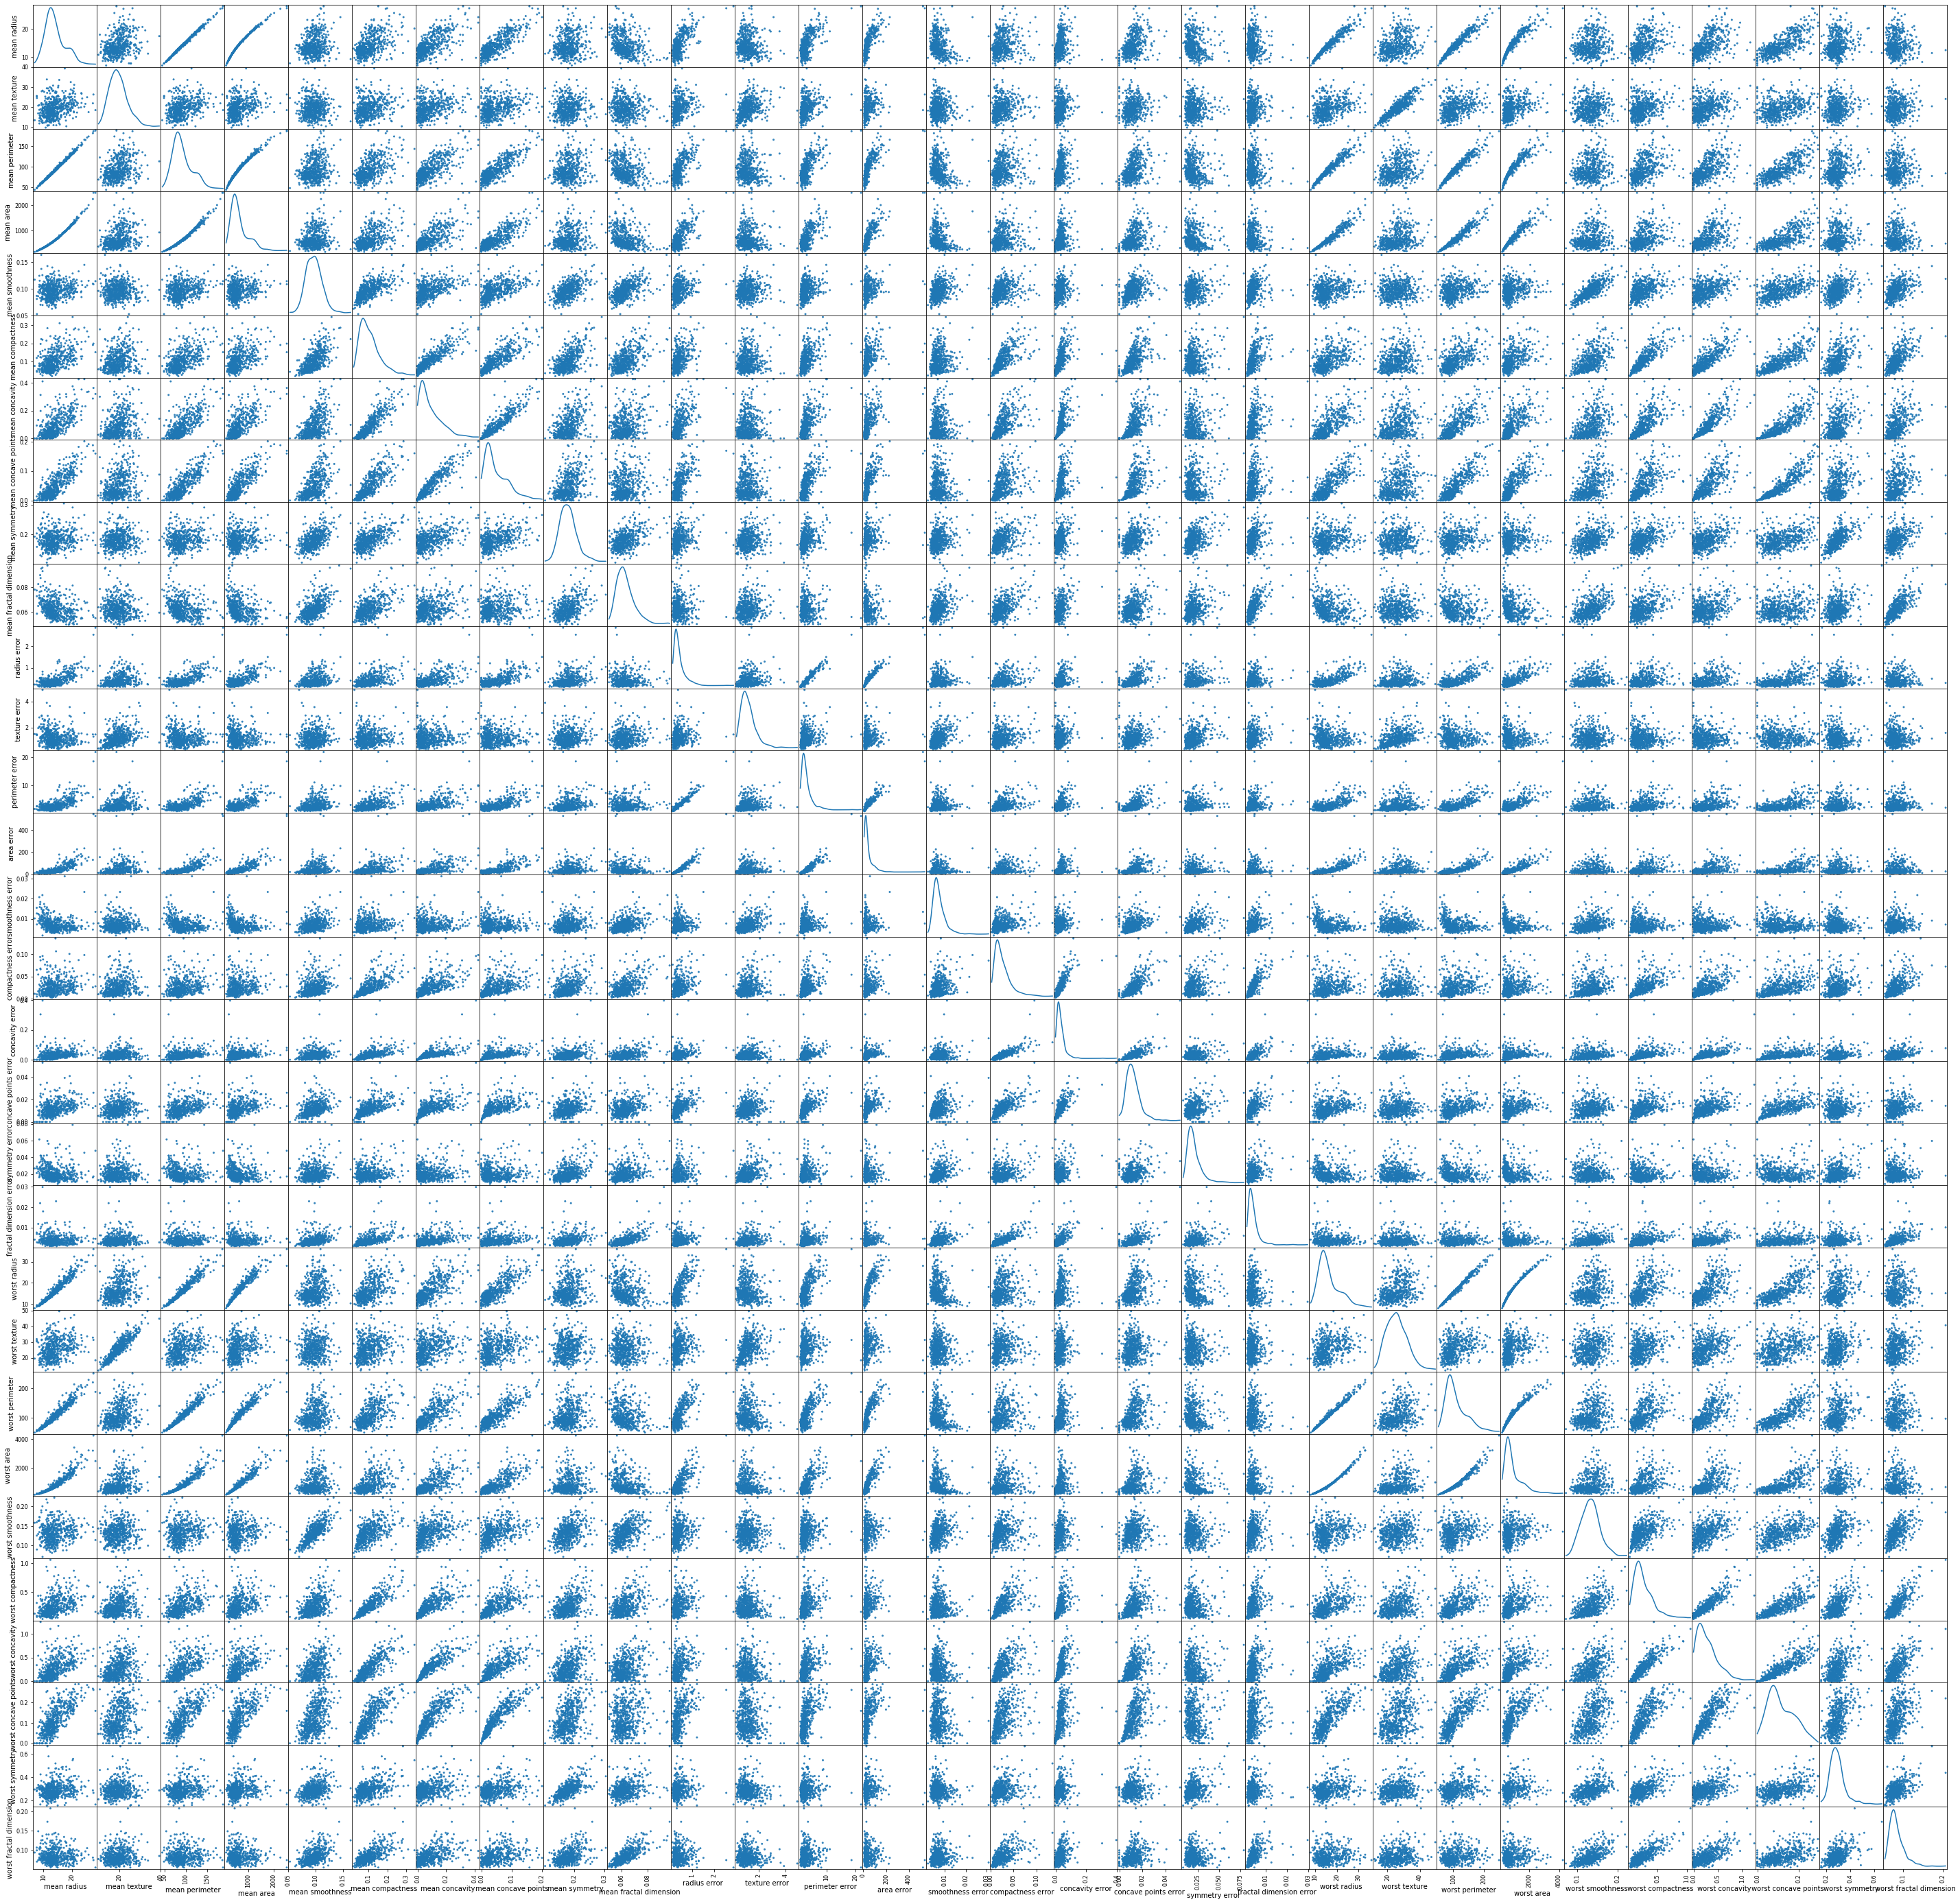

In [17]:
# Reference : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html

# Not keen on seeing the scatter plot for ID and Diagnosis
scatter_matrix(df_raw.iloc[:,2:32], alpha=0.9, figsize=(50, 50), diagonal='kde')
#alpha is the amount of transparency to use
#diagonal gives either kernel density estimation or a histogram plot i n the diagoanl. Kernel desntiy estimation
#is a way to estimate the probability density function of a random variable. 

#### Observation
Seems like quite a few variables may have variability to differentiate between the two categories and many of them are correlated. There is a scope for reducing the dimension of the attribute set from 30 to a smaller number.

### Dataset preparation
Since PCA is an unsupervised approach (the analysis does not depend on the labels or categories or response to predict), we would want to remove the ID and the Diagnosis columns

In [19]:
df = df_raw.iloc[:,2:32]

## Principal Component Analysis
The analysis consists of five main steps:
1. Computing the covariance matrix. Covariance matrix is a square symmetric matrix that captures the variance of the attributes on the diagonal and pair-wise covariances among attributes on the off diagonal. When the covariance values are scaled by the variance on the diagonal and product of the individual standard deviations on the off diagnoal, the resultant matrix is known as Correlation matrix. It is also same as computing the covariance of standardized (centered and scaled, i.e. subtract mean and divide by standard deviation) data matrix
2. Factoring the covariance (or correlation) matrix into eigenvalues and eigenvectors
3. Scree plot. It is a plot of eigenvalue order number vs proportion of variance explained by the eigenvalue. It is a useful visual way to to determine how many components should be selected. To determine the number of compnents we look for an bend in the scree plot.
4. Computing the principal components  
5. Interpretation



### Covariance Matrix

In [20]:
#find the covariance matrix, apparently all it is, is df.cov()
df_cov = df.cov()
df_cov

mean radius  mean texture  mean perimeter  \
mean radius                12.418920      4.907582       85.447142   
mean texture                4.907582     18.498909       34.439759   
mean perimeter             85.447142     34.439759      590.440480   
mean area                1224.483409    485.993787     8435.772345   
mean smoothness             0.008454     -0.001415        0.070836   
mean compactness            0.094197      0.053767        0.714714   
mean concavity              0.190128      0.103692        1.387234   
mean concave points         0.112475      0.048977        0.802360   
mean symmetry               0.014273      0.008419        0.121922   
mean fractal dimension     -0.007754     -0.002321       -0.044859   
radius error                0.663650      0.329037        4.661401   
texture error              -0.189189      0.916695       -1.162988   
perimeter error             4.803550      2.449449       34.053028   
area error                117.968162     50.840865      823.492755   
smoothness error           -0.002355      0.000085       -0.014788   
compactness error           0.013001      0.014787        0.109111   
concavity error             0.020659      0.018604        0.167296   
concave points error        0.008180      0.004348        0.061055   
symmetry error             -0.003039      0.000325       -0.016396   
fractal dimension error    -0.000398      0.000620       -0.000355   
worst radius               16.513749      7.329267      113.858063   
worst texture               6.433100     24.110148       45.258113   
worst perimeter           114.288570     51.745933      792.328208   
worst area               1888.227223    841.283832    13026.148359   
worst smoothness            0.009625      0.007611        0.083526   
worst compactness           0.229249      0.188010        1.742478   
worst concavity             0.387386      0.270110        2.858506   
worst concave points        0.172393      0.083491        1.231848   
worst symmetry              0.035746      0.027942        0.284300   
worst fractal dimension     0.000450      0.009260        0.022391   

                             mean area  mean smoothness  mean compactness  \
mean radius                1224.483409         0.008454          0.094197   
mean texture                485.993787        -0.001415          0.053767   
mean perimeter             8435.772345         0.070836          0.714714   
mean area                123843.554318         0.876178          9.264931   
mean smoothness               0.876178         0.000198          0.000490   
mean compactness              9.264931         0.000490          0.002789   
mean concavity               19.244924         0.000585          0.003718   
mean concave points          11.241958         0.000302          0.001703   
mean symmetry                 1.459596         0.000215          0.000873   
mean fractal dimension       -0.703426         0.000058          0.000211   
radius error                 71.490945         0.001176          0.007286   
texture error               -12.867168         0.000531          0.001346   
perimeter error             517.009995         0.008420          0.058612   
area error                12808.517580         0.157742          1.094708   
smoothness error             -0.176221         0.000014          0.000021   
compactness error             1.339725         0.000080          0.000699   
concavity error               2.205952         0.000105          0.000910   
concave points error          0.808460         0.000033          0.000209   
symmetry error               -0.210896         0.000023          0.000100   
fractal dimension error      -0.018519         0.000011          0.000071   
worst radius               1637.521341         0.014487          0.136643   
worst texture               621.824934         0.003118          0.080544   
worst perimeter           11341.789807         0.112879          1.047413   
worst 

In [22]:
# Reference: https://numpy.org/doc/stable/reference/routines.linalg.html
#Then find the eigenvales and eigen vectors of the covariance matrix    
w, v = np.linalg.eig(df_cov)

#w are the eigne values, v are the eigen vectors.
print(w)
print(v)

[4.43782605e+05 7.31010006e+03 7.03833742e+02 5.46487379e+01
 3.98900178e+01 3.00458768e+00 1.81533030e+00 3.71466740e-01
 1.55513547e-01 8.40612196e-02 3.16089533e-02 7.49736514e-03
 3.16165652e-03 2.16150395e-03 1.32653879e-03 6.40269304e-04
 3.74883320e-04 2.35169626e-04 1.84583467e-04 1.64180064e-04
 7.81102011e-05 5.76111660e-05 3.49172775e-05 2.83952689e-05
 1.61463677e-05 1.24902419e-05 7.01997261e-07 3.68048171e-06
 2.84790425e-06 2.00491564e-06]
[[ 5.08623202e-03  9.28705650e-03 -1.23425821e-02  3.42380473e-02
  -3.54561138e-02  1.31213101e-01  3.35131912e-02  7.54924585e-02
  -3.50549264e-01 -1.39559852e-01  4.19346972e-01 -7.35141931e-01
   2.18087182e-01  8.10260113e-02  1.37865559e-01  1.41957144e-01
  -4.42129324e-02 -8.97292328e-02  2.10057742e-02  8.01074429e-02
   5.94747776e-02  8.72363409e-03 -4.57847381e-03 -2.82894830e-02
  -3.59617411e-03 -1.60336173e-03  6.48447162e-04  2.79341068e-03
  -3.25869730e-03  5.12865809e-04]
 [ 2.19657026e-03 -2.88160658e-03 -6.3549785

In [25]:
#total variance is given by the sum of all eigenvalues
totalVariance = w.sum()

#the portion of variance accounted for by each component (Y) is given by the corresponding eigen value (eg if Y1 then that would be lambda1) and divided by the total. 
#for some reason it's called PVE here
PVE = w/w.sum()
PVE
np.cumsum(PVE)

array([9.82044672e-01, 1.61764899e-02, 1.55751075e-03, 1.20931964e-04,
       8.82724536e-05, 6.64883951e-06, 4.01713682e-06, 8.22017197e-07,
       3.44135279e-07, 1.86018721e-07, 6.99473205e-08, 1.65908880e-08,
       6.99641650e-09, 4.78318306e-09, 2.93549214e-09, 1.41684927e-09,
       8.29577731e-10, 5.20405883e-10, 4.08463983e-10, 3.63313378e-10,
       1.72849737e-10, 1.27487508e-10, 7.72682973e-11, 6.28357718e-11,
       3.57302295e-11, 2.76396041e-11, 1.55344680e-12, 8.14452259e-12,
       6.30211541e-12, 4.43666945e-12])

array([0.98204467, 0.99822116, 0.99977867, 0.9998996 , 0.99998788,
       0.99999453, 0.99999854, 0.99999936, 0.99999971, 0.99999989,
       0.99999996, 0.99999998, 0.99999999, 0.99999999, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

Text(0.5, 1.0, 'Scree Plot')

Text(0.5, 0, 'Principal Component')

Text(0, 0.5, 'Eigenvalue')

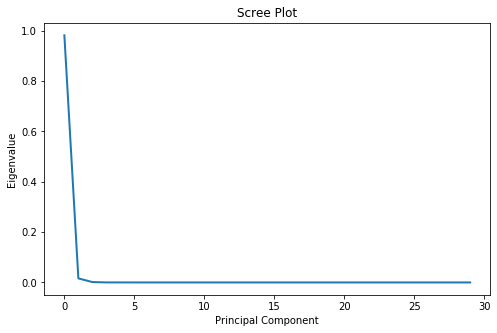

In [26]:

#Helpful means to plot
fig = plt.figure(figsize=(8,5))

plt.plot(PVE, linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
#So the variance of a given principal component is given by the eigenvalue. 
#We took the PVE which expresses this relationship but in terms of PVE/totalVariance.
#After plotting we see the most principal components really are 1 through 3, 
#the others hardly contribute any variance
plt.show()

In [27]:
print(v[:,1]) #prints single eigen vector. We do this so we can look at what values go into the calculation of Y1, the first principal component. Remember Y1 = e1'X, where e1 is the first eigenvector of covariance matrix.

[ 9.28705650e-03 -2.88160658e-03  6.27480827e-02  8.51823720e-01
 -1.48194356e-05 -2.68862249e-06  7.51419574e-05  4.63501038e-05
 -2.52430431e-05 -1.61197148e-05 -5.38692831e-05  3.48370414e-04
  8.19640791e-04  7.51112451e-03  1.49438131e-06  1.27357957e-05
  2.86921009e-05  9.36007477e-06  1.22647432e-05  2.89683790e-07
 -5.68673345e-04 -1.32152605e-02 -1.85961117e-04 -5.19742358e-01
 -7.68565692e-05 -2.56104144e-04 -1.75471479e-04 -3.05051743e-05
 -1.57042845e-04 -5.53071662e-05]


##### First Principal Component

(0.00929)*mean radius + (-0.00288)*mean texture + (0.06275)*mean perimeter + (0.85182)*mean area + (-0.00001)*mean smoothness + (-0.00000)*mean compactness + (0.00008)*mean concavity + (0.00005)*mean concave points + (-0.00003)*mean symmetry + (-0.00002)*mean fractal dimension + (-0.00005)*radius error + (0.00035)*texture error + (0.00082)*perimeter error + (0.00751)*area error + (0.00000)*smoothness error + (0.00001)*compactness error + (0.00003)*concavity error + (0.00001)*concave points error + (0.00001)*symmetry error + (0.00000)*fractal dimension error + (-0.00057)*worst radius + (-0.01322)*worst texture + (-0.00019)*worst perimeter + (-0.51974)*worst area + (-0.00008)*worst smoothness + (-0.00026)*worst compactness + (-0.00018)*worst concavity + (-0.00003)*worst concave points + (-0.00016)*worst symmetry + (-0.00006)*worst fractal dimension

##### Observation
From the Scree plot (eigenvalue vs PVE), we can visually deduce that the first component would capture about 98% of the variability, but when we take a closer look at the first principal component, we quickly realize it is dominated by variables with large variances and magnitudes, 'mean area' and 'worst area'. As seen above, worst area is -0.51974, and mean area are at least a factor of 10 to 10000 larger than everything else. We can correct this by considering the correlation matrix for computing the principal components. (From above, correlation matrix is when the covariance values are scaled by the variance on the diagonal and product of the individual standard deviations on the off diagonal. OR a better explantion, we standardize the data matrix, so subtract the mean from everythign, and divide by the standard deviation, and then we find that covariance. QUESTION: Do we subtract the mean on individual columns? (I'd assume so)


### Correlation Matrix (or Covariance matrix of Standardized Data)

In [28]:
df_corr = df.corr() #luckily there's an easy way to find this!
df_corr

mean radius  mean texture  mean perimeter  mean area  \
mean radius                 1.000000      0.323782        0.997855   0.987357   
mean texture                0.323782      1.000000        0.329533   0.321086   
mean perimeter              0.997855      0.329533        1.000000   0.986507   
mean area                   0.987357      0.321086        0.986507   1.000000   
mean smoothness             0.170581     -0.023389        0.207278   0.177028   
mean compactness            0.506124      0.236702        0.556936   0.498502   
mean concavity              0.676764      0.302418        0.716136   0.685983   
mean concave points         0.822529      0.293464        0.850977   0.823269   
mean symmetry               0.147741      0.071401        0.183027   0.151293   
mean fractal dimension     -0.311631     -0.076437       -0.261477  -0.283110   
radius error                0.679090      0.275869        0.691765   0.732562   
texture error              -0.097317      0.386358       -0.086761  -0.066280   
perimeter error             0.674172      0.281673        0.693135   0.726628   
area error                  0.735864      0.259845        0.744983   0.800086   
smoothness error           -0.222600      0.006614       -0.202694  -0.166777   
compactness error           0.206000      0.191975        0.250744   0.212583   
concavity error             0.194204      0.143293        0.228082   0.207660   
concave points error        0.376169      0.163851        0.407217   0.372320   
symmetry error             -0.104321      0.009127       -0.081629  -0.072497   
fractal dimension error    -0.042641      0.054458       -0.005523  -0.019887   
worst radius                0.969539      0.352573        0.969476   0.962746   
worst texture               0.297008      0.912045        0.303038   0.287489   
worst perimeter             0.965137      0.358040        0.970387   0.959120   
worst area                  0.941082      0.343546        0.941550   0.959213   
worst smoothness            0.119616      0.077503        0.150549   0.123523   
worst compactness           0.413463      0.277830        0.455774   0.390410   
worst concavity             0.526911      0.301025        0.563879   0.512606   
worst concave points        0.744214      0.295316        0.771241   0.722017   
worst symmetry              0.163953      0.105008        0.189115   0.143570   
worst fractal dimension     0.007066      0.119205        0.051019   0.003738   

                         mean smoothness  mean compactness  mean concavity  \
mean radius                     0.170581          0.506124        0.676764   
mean texture                   -0.023389          0.236702        0.302418   
mean perimeter                  0.207278          0.556936        0.716136   
mean area                       0.177028          0.498502        0.685983   
mean smoothness                 1.000000          0.659123        0.521984   
mean compactness                0.659123          1.000000        0.883121   
mean concavity                  0.521984          0.883121        1.000000   
mean concave points             0.553695          0.831135        0.921391   
mean symmetry                   0.557775          0.602641        0.500667   
mean fractal dimension          0.584792          0.565369        0.336783   
radius error                    0.301467          0.497473        0.631925   
texture error                   0.068406          0.046205        0.076218   
perimeter error                 0.296092          0.548905        0.660391   
area error                      0.246552          0.455653        0.617427   
smoothness error                0.332375          0.135299        0.098564   
compactness error               0.318943          0.738722        0.670279   
concavity error                 0.248396          0.570517        0.691270   
concave points error            0.380676          0.642262        0.683260   
symmetry error                 

In [29]:
w_, v_ = np.linalg.eig(df_corr) #now, find the eigen values of the correlation matrix. (w is values, v is vectors)

print(w_)
#print(v_)

[1.32816077e+01 5.69135461e+00 2.81794898e+00 1.98064047e+00
 1.64873055e+00 1.20735661e+00 6.75220114e-01 4.76617140e-01
 4.16894812e-01 3.50693457e-01 2.93915696e-01 2.61161370e-01
 2.41357496e-01 1.57009724e-01 9.41349650e-02 7.98628010e-02
 5.93990378e-02 5.26187835e-02 4.94775918e-02 1.33044823e-04
 7.48803097e-04 1.58933787e-03 6.90046388e-03 8.17763986e-03
 1.54812714e-02 1.80550070e-02 2.43408378e-02 2.74394025e-02
 3.11594025e-02 2.99728939e-02]


array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 4.43482743e-06,
       2.49601032e-05, 5.29779290e-05, 2.30015463e-04, 2.72587995e-04,
       5.16042379e-04, 6.01833567e-04, 8.11361259e-04, 9.14646751e-04,
       1.03864675e-03, 9.99096464e-04])

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99453783,
       0.99456279, 0.99461577, 0.99484578, 0.99511837, 0.99563442,
       0.99623625, 0.99704761, 0.99796226, 0.9990009 , 1.        ])

Text(0.5, 1.0, 'Scree Plot')

Text(0.5, 0, 'Principal Component')

Text(0, 0.5, 'Eigenvalue')

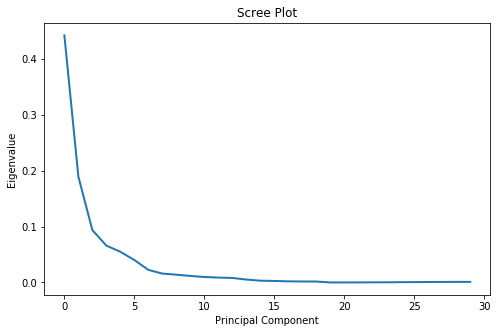

In [30]:
#Determing the number of principal components
PVE_ = w_/w_.sum() #perform similar operation to previous, where we're finding the relative amount each PC has with respect to total variability
PVE_
np.cumsum(PVE_)

fig = plt.figure(figsize=(8,5))

plt.plot(PVE_, linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

In [31]:
print(v[:,1:14])

[[ 9.28705650e-03 -1.23425821e-02  3.42380473e-02 -3.54561138e-02
   1.31213101e-01  3.35131912e-02  7.54924585e-02 -3.50549264e-01
  -1.39559852e-01  4.19346972e-01 -7.35141931e-01  2.18087182e-01
   8.10260113e-02]
 [-2.88160658e-03 -6.35497857e-03  3.62415111e-01  4.43187450e-01
   2.13486089e-01 -7.84253475e-01  6.87405638e-02  4.08376429e-03
  -7.66679112e-02 -2.90168453e-02  1.77040388e-03  4.23058843e-03
   1.98471260e-03]
 [ 6.27480827e-02 -7.16694814e-02  3.29281417e-01 -3.13382893e-01
   8.40324225e-01  1.89074737e-01 -8.39642267e-02  1.32828034e-01
   8.92113884e-02 -2.68885270e-03  8.17809788e-02 -2.51180394e-02
  -5.22865768e-03]
 [ 8.51823720e-01 -2.78944181e-02 -3.94122494e-02  4.60378117e-02
  -5.23468101e-02 -7.33787337e-03  3.00992471e-03 -3.82916116e-03
  -1.95571374e-03 -3.44514452e-03  1.46297165e-03 -2.00988446e-04
  -3.38365236e-04]
 [-1.48194356e-05  7.26596827e-05  3.44153009e-04 -5.79019359e-04
   4.06502430e-04  1.60796958e-03 -3.43658580e-03  8.22698130e-03


##### First few principal components
First Principal Component:
(-0.23386)*mean radius + (-0.05971)*mean texture + (-0.21518)*mean perimeter + (-0.23108)*mean area + (0.18611)*mean smoothness + (0.15189)*mean compactness + (0.06017)*mean concavity + (-0.03477)*mean concave points + (0.19035)*mean symmetry + (0.36658)*mean fractal dimension + (-0.10555)*radius error + (0.08998)*texture error + (-0.08946)*perimeter error + (-0.15229)*area error + (0.20443)*smoothness error + (0.23272)*compactness error + (0.19721)*concavity error + (0.13032)*concave points error + (0.18385)*symmetry error + (0.28009)*fractal dimension error + (-0.21987)*worst radius + (-0.04547)*worst texture + (-0.19988)*worst perimeter + (-0.21935)*worst area + (0.17230)*worst smoothness + (0.14359)*worst compactness + (0.09796)*worst concavity + (-0.00826)*worst concave points + (0.14188)*worst symmetry + (0.27534)*worst fractal dimension

Second Principal Component:
(-0.00853)*mean radius + (0.06455)*mean texture + (-0.00931)*mean perimeter + (0.02870)*mean area + (-0.10429)*mean smoothness + (-0.07409)*mean compactness + (0.00273)*mean concavity + (-0.02556)*mean concave points + (-0.04024)*mean symmetry + (-0.02257)*mean fractal dimension + (0.26848)*radius error + (0.37463)*texture error + (0.26665)*perimeter error + (0.21601)*area error + (0.30884)*smoothness error + (0.15478)*compactness error + (0.17646)*concavity error + (0.22466)*concave points error + (0.28858)*symmetry error + (0.21150)*fractal dimension error + (-0.04751)*worst radius + (-0.04230)*worst texture + (-0.04855)*worst perimeter + (-0.01190)*worst area + (-0.25980)*worst smoothness + (-0.23608)*worst compactness + (-0.17306)*worst concavity + (-0.17034)*worst concave points + (-0.27131)*worst symmetry + (-0.23279)*worst fractal dimension

Third Principal Component:
(0.04141)*mean radius + (-0.60305)*mean texture + (0.04198)*mean perimeter + (0.05343)*mean area + (0.15938)*mean smoothness + (0.03179)*mean compactness + (0.01912)*mean concavity + (0.06534)*mean concave points + (0.06712)*mean symmetry + (0.04859)*mean fractal dimension + (0.09794)*radius error + (-0.35986)*texture error + (0.08899)*perimeter error + (0.10821)*area error + (0.04466)*smoothness error + (-0.02747)*compactness error + (0.00132)*concavity error + (0.07407)*concave points error + (0.04407)*symmetry error + (0.01530)*fractal dimension error + (0.01542)*worst radius + (-0.63281)*worst texture + (0.01380)*worst perimeter + (0.02589)*worst area + (0.01765)*worst smoothness + (-0.09133)*worst compactness + (-0.07395)*worst concavity + (0.00601)*worst concave points + (-0.03625)*worst symmetry + (-0.07705)*worst fractal dimension

Fourth Principal Component:
(-0.03779)*mean radius + (0.04947)*mean texture + (-0.03737)*mean perimeter + (-0.01033)*mean area + (0.36509)*mean smoothness + (-0.01170)*mean compactness + (-0.08638)*mean concavity + (0.04386)*mean concave points + (0.30594)*mean symmetry + (0.04442)*mean fractal dimension + (0.15446)*radius error + (0.19165)*texture error + (0.12099)*perimeter error + (0.12757)*area error + (0.23207)*smoothness error + (-0.27997)*compactness error + (-0.35398)*concavity error + (-0.19555)*concave points error + (0.25287)*symmetry error + (-0.26330)*fractal dimension error + (0.00441)*worst radius + (0.09288)*worst texture + (-0.00745)*worst perimeter + (0.02739)*worst area + (0.32444)*worst smoothness + (-0.12180)*worst compactness + (-0.18852)*worst concavity + (-0.04333)*worst concave points + (0.24456)*worst symmetry + (-0.09442)*worst fractal dimension


Fifth Principal Component:
(0.01874)*mean radius + (-0.03218)*mean texture + (0.01731)*mean perimeter + (-0.00189)*mean area + (-0.28637)*mean smoothness + (-0.01413)*mean compactness + (-0.00934)*mean concavity + (-0.05205)*mean concave points + (0.35646)*mean symmetry + (-0.11943)*mean fractal dimension + (-0.02560)*radius error + (-0.02875)*texture error + (0.00181)*perimeter error + (-0.04286)*area error + (-0.34292)*smoothness error + (0.06920)*compactness error + (0.05634)*concavity error + (-0.03122)*concave points error + (0.49025)*symmetry error + (-0.05320)*fractal dimension error + (-0.00029)*worst radius + (-0.05001)*worst texture + (0.00850)*worst perimeter + (-0.02516)*worst area + (-0.36926)*worst smoothness + (0.04771)*worst compactness + (0.02838)*worst concavity + (-0.03087)*worst concave points + (0.49893)*worst symmetry + (-0.08022)*worst fractal dimension

##### Observation
For standardized data, the variables contribute equally to the principal components determined from the correlation matrix. We can successfully replace the original data matrix with the first 14 prinicpal components cumulatively explaining 98% of the total sample variance. Hence we have reduced the dimensions from 30 attributes to 14 with little loss of information. NOT Made clear in the original lecture, but this is the point of PCA.

Regarding interpretation, we can deduce by looking at the weights that the first principal seems to be a contrast of attributes capturing the size versus other features such as smoothness, compactness, symmetry etc. The second principal component could be interpreted as weighted difference of "error" versus the "worst" aspect of the attributes. The third principal component is capturing the "texture" related features.  

Principal components derived from covariance matrix are different from the ones derived from the correlation matrix. If the original dataset has attrubutes on varying scales, it is recommended to standardized the data matrix or use correlation matrix.

## Alternate Libraries

This data is also available as part of the Scikit-Learn library
Scikit-Learn is machine learning library available in python. As part of the library there are seven datasets provided to learn the various approaches. You can read about the different datasets and tutorial on loading them here
https://towardsdatascience.com/how-to-use-scikit-learn-datasets-for-machine-learning-d6493b38eca3


For additional reading on scikit-learn: https://scikit-learn.org/stable/index.html

In [ ]:
import sklearn.datasets
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
cancer = sklearn.datasets.load_breast_cancer()
# the object returned is a bunch object , a dictionary like object with keys as attributes
cancer.data.shape
colnames = cancer.feature_names
print(cancer.DESCR)

#Convert the format bunch to a pandas dataframe for ease of mani
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

In [ ]:
scaler = preprocessing.StandardScaler().fit(df)
df_scaled = pd.DataFrame(scaler.transform(df))

#df_scaled.mean()
#df_scaled.std()

# Standardizing data matrix
df_stand = pd.DataFrame(preprocessing.StandardScaler().fit_transform(df))
#df_stand.cov()

In [ ]:
pca=PCA(n_components=30) 
pca.fit(df_scaled) 
X_pca=pca.transform(df_scaled) 
#let's check the shape of X_pca array
print("shape of X_pca", X_pca.shape)
print(np.cumsum(pca.explained_variance_ratio_))

# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html